In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skimage
%matplotlib inline

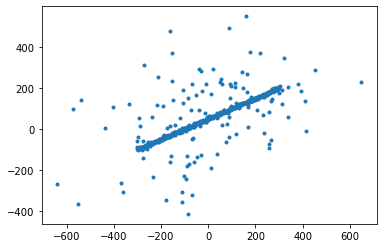

In [2]:
x = np.arange(-300, 300)
y = 0.5*x + 50

data = np.column_stack([x,y])

data_faulty = np.array(40* [(200.0, -130)])
data_faulty += 4* np.random.normal(size = data_faulty.shape)
data_faulty = data[:data_faulty.shape[0]]

data_noise = np.random.normal(size = data.shape)

data += 2* data_noise
data[::2] += 3* data_noise[::2]
data[::5] += 150* data_noise[::5]
plt.plot(data[:,0], data [:,1], '.')

In [3]:
#import LineModelND(Total least squares estimator for N-dimensional lines) and ransac
from skimage.measure import LineModelND, ransac

In [4]:
# Starting point 
nd_model = LineModelND()
nd_model.estimate(data)
# Instead of m and c, it parameterizes the line by origin and direction --- much safer when dealing with vertical lines
nd_model.params


(array([-1.19627653, 52.48406056]), array([0.88671635, 0.46231387]))

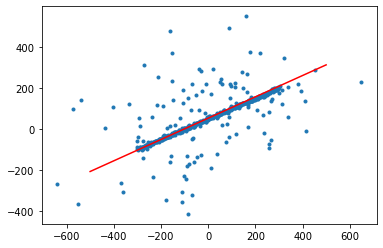

In [5]:
#draw a line
x1 = np.arange(-500,500)
orig, direc = nd_model.params
plt.plot(data[:,0], data[:,1], '.')
plt.plot(x1, nd_model.predict_y(x1),  'r-')

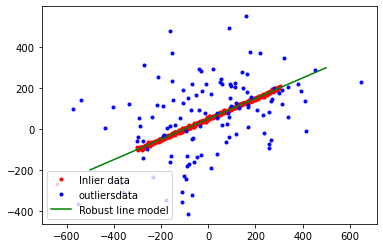

In [10]:
# implementing RANSAC
model_robust, inliers = ransac(data, LineModelND, min_samples =2, 
                               residual_threshold = 10, max_trials = 1000)
outliers = (inliers ==False)

yy = model_robust.predict_y(x1)

fig, ax = plt.subplots()

ax.plot(data[inliers, 0], data[inliers, 1], '.r', alpha = 1, label = 'Inlier data')
ax.plot(data[outliers, 0], data[outliers, 1], '.b', alpha =1, label = 'outliersdata')
ax.plot(x1, yy, '-g', label = 'Robust line model')
plt.legend(loc = 'lower left')
plt.show()